# CoderHouse - Grupo 7 - Primera Entrega Proyecto Final

* <b>Profesor:</b> David Romero Acosta

* <b>Tutoria:</b> Hector Ponce Schwarz

<b>Alumnos:</b>
* Juan Pascual
* Lucas Ariel Saavedra
* Bartolome Oscar Meritello
* Jose Mornaghi


## Preguntas y objetivos principales

El objetivo principal de este trabajo es predecir si un individuo sufrirá un accidente cerebrovascular (Stroke) o no. Para esto obtuvimos información de un dataset tomado de Kaggle (https://www.kaggle.com/) e intentamos responder a ciertas preguntas cómo:
* ¿La edad impacta en las probabilidades de sufrir esta enfermedad?
* ¿El estilo de vida de una persona la podría inducir a sufrir esta dolencia?
    * ¿En que medida respecto a la edad por ejemplo?
    * ¿Ser fumador influye en la misma?
    * ¿El nivel de glucosa en sangre?
    * ¿El indice de masa corporal?
    * ¿El tipo de trabajo?
* ¿Los hombres son más propensos a sufrir un ACV?
* ¿El lugar de residencia de una persona podría influir?
* Padecer de hipertensión o haber sufrido un ataque al corazón aumentan el riesgo, ¿Es esto cierto?

Antes de continuar con el análisis de la información debemos hacer enfásis en preguntarnos:
* [¿Qué es un ACV (stroke)?](https://www.stroke.org/en/about-stroke)
* [¿Cómo podemos prevenirlo?](https://www.hospitalaleman.org.ar/prevencion/acv-como-prevenirlo/)

## Descripción del DataSet

El dataset utilizado presenta 12 variables, 11 de las cuales nos ayudarán (o no) a responder las preguntas planteadas previamente entorno a la variable objetivo "Stroke". A continuación describiremos brevemente cada una de estas variables, algunas categoricas y algunas numéricas:

* id: número identificatorio del individuo.
* gender: género del individuo estudiado (masculino, femenino)
* age: edad del indidividuo
* hypertension: parámetro de salud relacionado. ¿El individuo tiene hipertensión? Posibles respuestas: Si (1), No (0).
* heart_disease: parámetro de salud relacionado. ¿El individuo tiene alguna enfermedad cardíaca? Posibles respuestas: Si (1), No (0).
* ever_married: estado civil del individuo. ¿Está casado? Si, No.
* work_type: tipo de trabajao del individuo. Se toma en consideración la posibilidad de que el mismo sea un niño y en ese caso se lo marca como tal. Posibles respuestas: Privado, 'Self-employed', 'Govt_job', Niño, 'Never_worked'.
* Residence_type: parámetro personal, tipo de residencia del individuo distinguiendo entre zona Urbana o Rural.
* avg_glucose_level
* smoking_status: parámetro de salud relacionado. ¿Es fumador el individuo? Posibles respuestas: Si (1), No (0).
* bmi: parámetro de salud relacionado. Indice de masa del individuo.
* stroke: variable 'Target' u Objetivo. ¿La persona sufrió un Stroke?

## Importación de las Librerías Necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import plotly.express as px
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")

## Vistazo inicial del DataSet

In [2]:
stroke_dataset = pd.read_csv("stroke.csv")
stroke_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Reprocesamiento inicial de los Datos - Buscando Nan Values

En principio replanteamos el DataSet sacando el dato ID ya que será totalmente irrelevante para nuestro análisis.

In [3]:
stroke_dataset = stroke_dataset.drop("id", axis=1)

Desplegamos la info....

In [4]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Obtenemos los datos nulos de las columnas

In [5]:
stroke_dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Podemos ver que la unica variable que contiene datos NaN (nulos) es la del índice de masa corporal ('bmi').
En base a esta información, imputaremos los datos de la variable BMI con la función KNNImputer. Los valores faltantes de cada muestra se imputan utilizando el valor medio de los vecinos más cercanos de n_neighbors que se encuentran en el conjunto de entrenamiento.

In [6]:
imputador = KNNImputer(n_neighbors=3, weights="uniform")
stroke_dataset['imputed_bmi'] = imputador.fit_transform(stroke_dataset[['bmi']])
stroke_dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
imputed_bmi            0
dtype: int64

In [7]:
stroke_dataset.describe()[["bmi", "imputed_bmi"]].T

,count,mean,std,min,25%,50%,75%,max
bmi,4909.0,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6
imputed_bmi,5110.0,28.893237,7.698018,10.3,23.8,28.4,32.8,97.6


De ahora en más, trabajaremos con el DataSet con los datos de BMI imputados, creando un nuevo archivo CSV y trabajaremos con el mismo.

In [8]:
stroke_dataset = stroke_dataset.drop("bmi", axis = 1)
stroke_dataset = stroke_dataset.rename(columns={'imputed_bmi': 'bmi'})
stroke_dataset.to_csv("stroke_imputed.csv", index=False)

In [9]:
stroke_dataset = pd.read_csv("stroke_imputed.csv")
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.600000
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.893237
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.500000
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.400000
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.893237
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.000000
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.600000
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.600000


# Análisis Univariado

Definimos la función que usaremos para realizar este análisis, que despliega un histógrama y un gráfico de caja de porcentajes de la variable analizada.

In [10]:
def histogramAndBoxPlot(stroke_dataset, variable):
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

    plot0=sns.distplot(stroke_dataset[stroke_dataset[variable]!=0][variable],ax=axes[0],color='brown')
    axes[0].set_title(f'Distribution of {variable}',fontdict={'fontsize':8})
    axes[0].set_xlabel(f'{variable}',fontdict={'fontsize':7})
    axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
    plt.tight_layout()

    plot1=sns.boxplot(stroke_dataset[stroke_dataset[variable]!=0][variable],ax=axes[1],orient='v')
    axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
    axes[1].set_xlabel(f'{variable}',fontdict={'fontsize':7})
    axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
    plt.tight_layout()

### Índice de masa corporal (BMI)

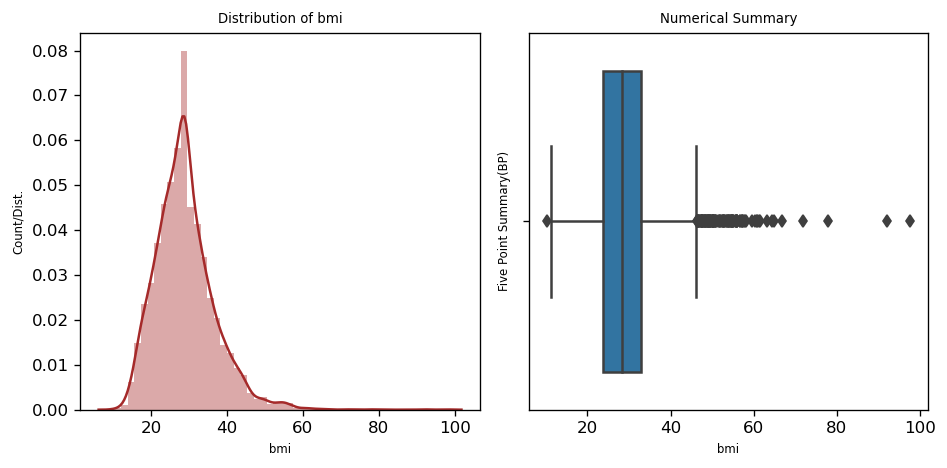

In [11]:
histogramAndBoxPlot(stroke_dataset, 'bmi')

Los analisis de bmi indican que los valores sobre 35 es obesidad extrema. Hay que analizar en el dataset si puede que algunos valores esten mal ingresados o no tengan sentido.

### Edad

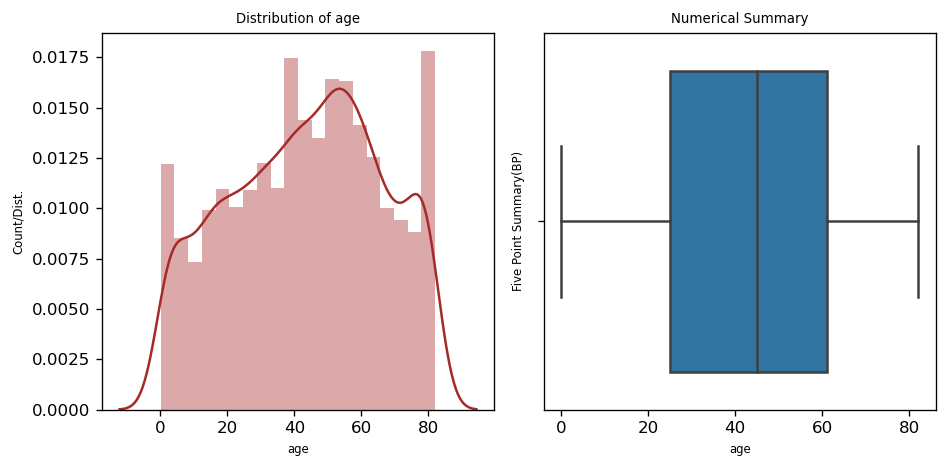

In [12]:
histogramAndBoxPlot(stroke_dataset, 'age')

### Nivel de Glucosa

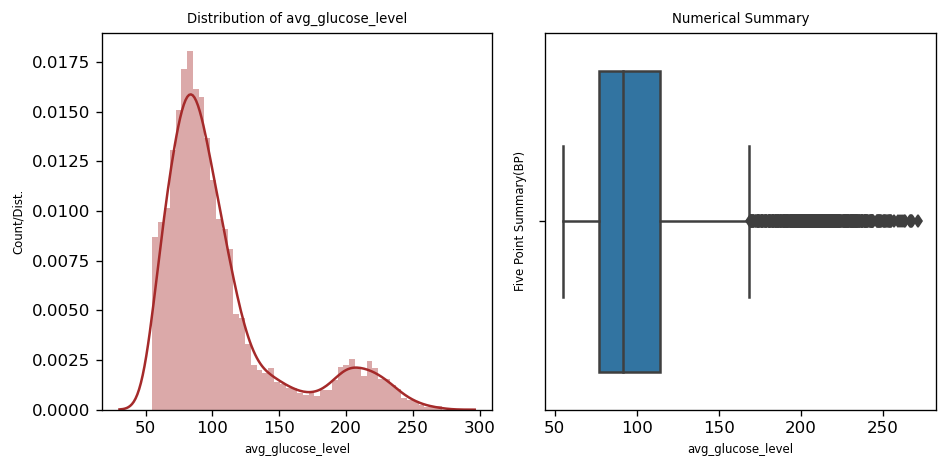

In [13]:
histogramAndBoxPlot(stroke_dataset, 'avg_glucose_level')

A continuación realizamos unos gráficos de torta de 3 variables, para así poder analizar la distribución de dichas variables categoricas:
- Género (gender)
- Hipertensión (hypertension)
- Enfermedades cardíacas (heart_disease)

### Género

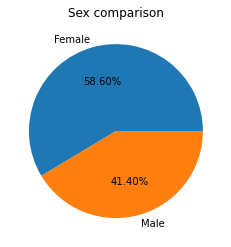

In [14]:
dataset = stroke_dataset.drop(3116)

sexComparison = dataset.groupby('gender').count()['stroke']

plt.pie(x=sexComparison, labels=sexComparison.index, autopct='%1.2f%%')
plt.title('Sex comparison')
plt.show()

### Hipertensión

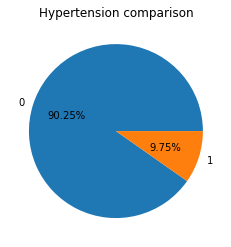

In [15]:
dataset = stroke_dataset.drop(3116)

sexComparison = dataset.groupby('hypertension').count()['stroke']

plt.pie(x=sexComparison, labels=sexComparison.index, autopct='%1.2f%%')
plt.title('Hypertension comparison')
plt.show()

### Enfermedades cardíacas

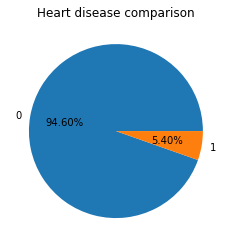

In [16]:
dataset = stroke_dataset.drop(3116)

sexComparison = dataset.groupby('heart_disease').count()['stroke']

plt.pie(x=sexComparison, labels=sexComparison.index, autopct='%1.2f%%')
plt.title('Heart disease comparison')
plt.show()

## Distribución de Frecuencias

Para finalizar el análisis univariado, realizamos una tabla de distribución de frecuencias de todas las variables categóricas y la variable objetivo. A fin de realizar dicha tabla, creamos una función auxiliar.

In [28]:
def frequencyTable(stroke_dataset, variable):
    frec = stroke_dataset[variable].value_counts()
    frec_df = pd.DataFrame(frec)
    frec_df.rename(columns={variable:'Frec_abs'},inplace=True)
    Frec_abs_val = frec_df["Frec_abs"].values
    acum = []
    valor_acum = 0
    for i in Frec_abs_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)
    frec_df["frec_abs_acum"] = acum
    frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(stroke_dataset[variable]),4)
    Frec_rel_val = frec_df["frec_rel_%"].values
    acum = []
    valor_acum = 0
    for i in Frec_rel_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)
    frec_df["frec_rel_%_acum"] = acum
    display(frec_df)

### Smoking status

In [31]:
frequencyTable(stroke_dataset, 'smoking_status')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
never smoked,1892,1892,37.0254,37.0254
Unknown,1544,3436,30.2153,67.2407
formerly smoked,885,4321,17.3190,84.5597
smokes,789,5110,15.4403,100.0000


### Género

In [32]:
frequencyTable(stroke_dataset, 'gender')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Female,2994,2994,58.5910,58.5910
Male,2115,5109,41.3894,99.9804
Other,1,5110,0.0196,100.0000


### Hipertensión

In [33]:
frequencyTable(stroke_dataset, 'hypertension')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4612,4612,90.2544,90.2544
1,498,5110,9.7456,100.0000


### Enfermedades cardíacas

In [35]:
frequencyTable(stroke_dataset, 'heart_disease')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4834,4834,94.5988,94.5988
1,276,5110,5.4012,100.0000


### Estado Civil

In [36]:
frequencyTable(stroke_dataset, 'ever_married')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Yes,3353,3353,65.6164,65.6164
No,1757,5110,34.3836,100.0000


### Tipo de trabajo

In [37]:
frequencyTable(stroke_dataset, 'work_type')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Private,2925,2925,57.2407,57.2407
Self-employed,819,3744,16.0274,73.2681
children,687,4431,13.4442,86.7123
Govt_job,657,5088,12.8571,99.5694
Never_worked,22,5110,0.4305,99.9999


### Tipo de residencia

In [38]:
frequencyTable(stroke_dataset, 'Residence_type')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
Urban,2596,2596,50.8023,50.8023
Rural,2514,5110,49.1977,100.0000


### ACV

In [39]:
frequencyTable(stroke_dataset, 'stroke')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,4861,4861,95.1272,95.1272
1,249,5110,4.8728,100.0000


# Análisis Bivariado

En este análisis realizaremos 2 tipos de gráficos para comparar de a 2 variables. Para hacer esto creamos 2 funciones auxiliares.

In [1]:
def boxPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.boxplot(dataset[target], dataset[variable], palette = 'viridis')
    plt.title(f'{target} vs {variable}', fontsize = 20)
    plt.show()

def violinPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.violinplot(dataset[target], dataset[variable], palette = 'colorblind')
    plt.title(f'Relación entre {variable} y {target}', fontsize = 20, fontweight = 30)
    plt.show()

Procedemos a reemplazar valores númericos dentro de las variables categoricas para poder realizar el heatmap

In [7]:
data.stroke = data.stroke.replace({0:'Non-Stroke',1:'Stroke'})
data.heart_disease = data.heart_disease.replace({0:'No',1:'Yes'})
data.hypertension = data.hypertension.replace({0:'No',1:'Yes'})
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,formerly smoked,Stroke,36.600000
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,never smoked,Stroke,28.893237
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,never smoked,Stroke,32.500000
3,Female,49.0,No,No,Yes,Private,Urban,171.23,smokes,Stroke,34.400000
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,never smoked,Stroke,24.000000


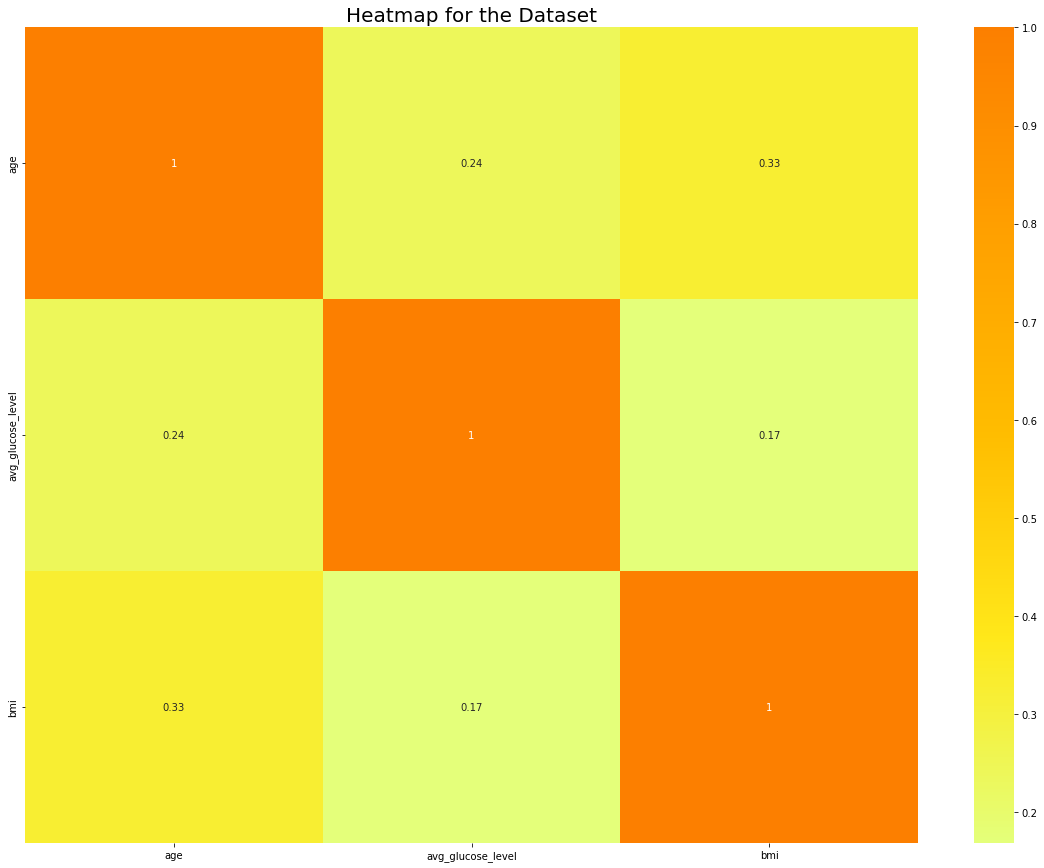

In [8]:
#HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Númerica vs Categórica

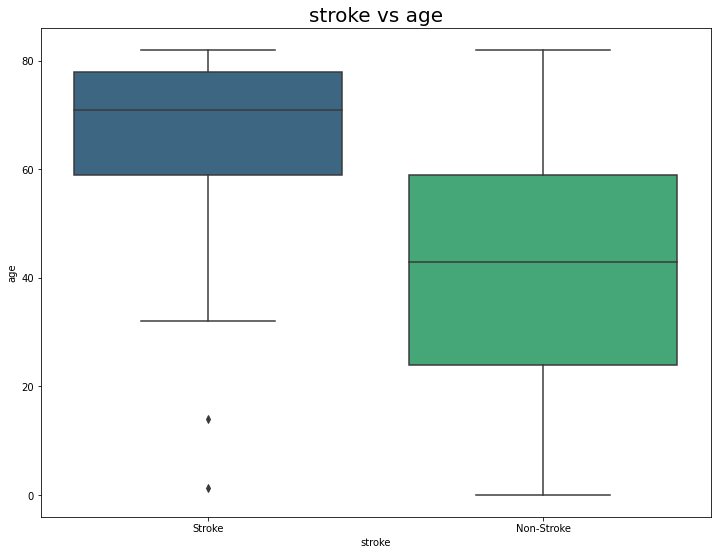

In [9]:
# age vs target
boxPlotComparison(data,'stroke','age')

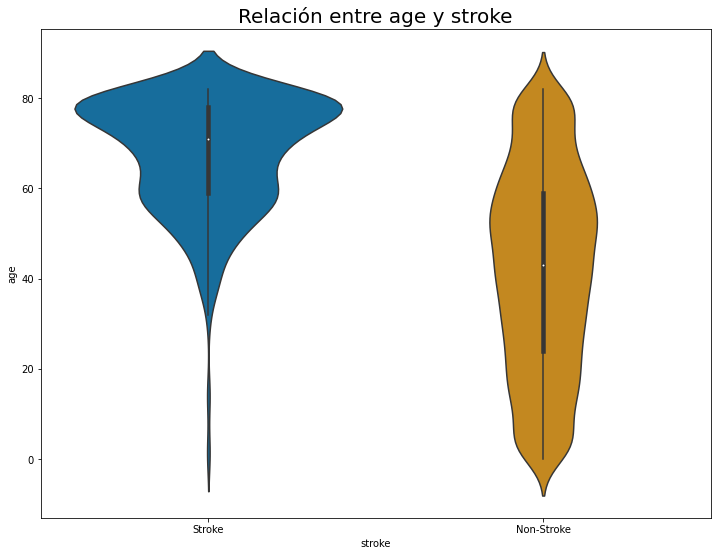

In [10]:
# age vs target
violinPlotComparison(data, 'stroke', 'age')

Podemos apreciar una clara influencia de la edad en las personas que sufrieron un stroke

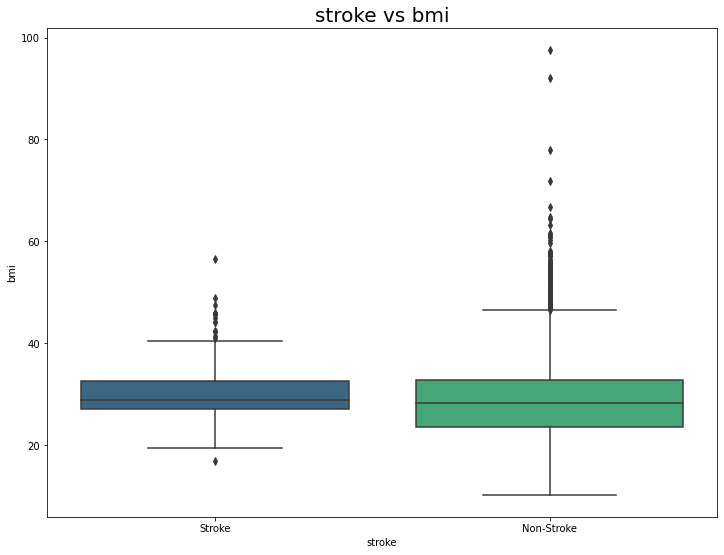

In [11]:
# bmi vs target
boxPlotComparison(data,'stroke','bmi')

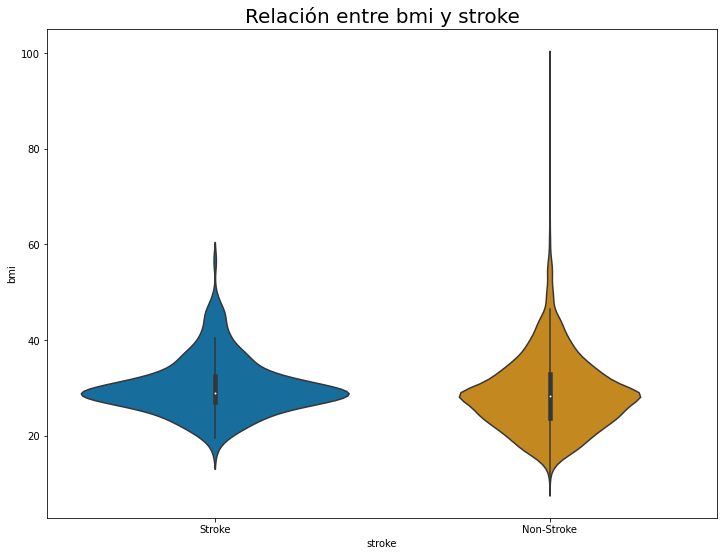

In [12]:
# bmi vs target
violinPlotComparison(data, 'stroke', 'bmi')

En este caso no podemos visualizar una influencia del bmi en la variable stroke

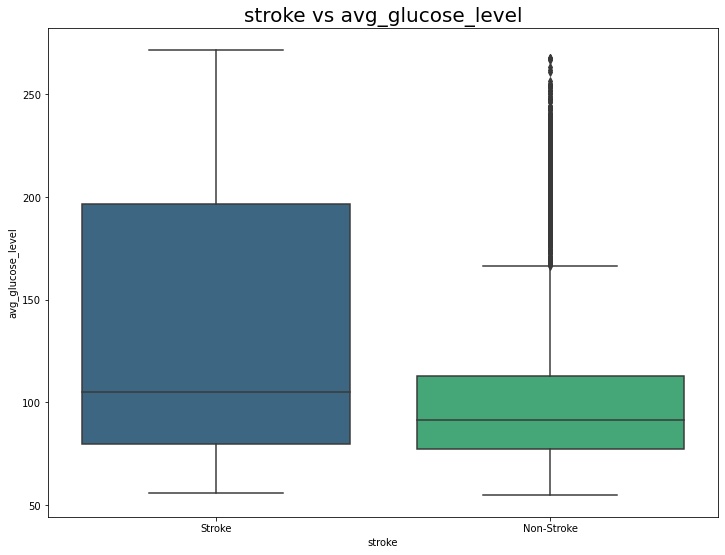

In [13]:
# avg_glucose_level vs target
boxPlotComparison(data,'stroke','avg_glucose_level')

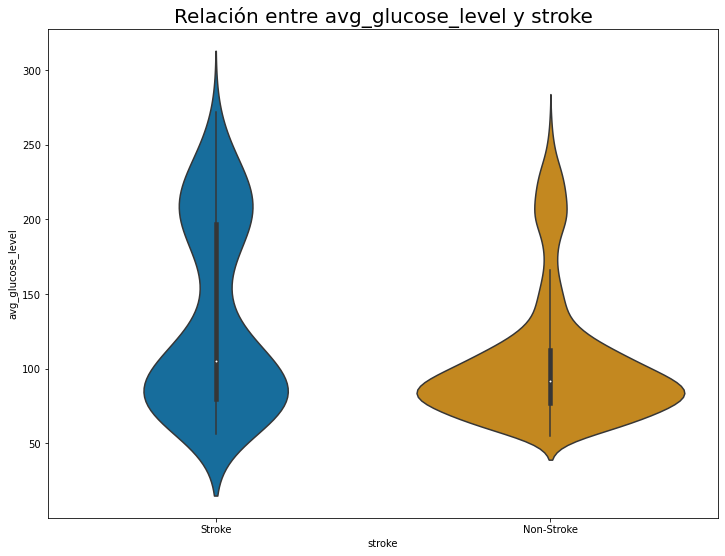

In [14]:
# avg_glucose_level vs target
violinPlotComparison(data, 'stroke', 'avg_glucose_level')

Acá podemos apreciar una leve influencia de la variable avg_glucose_level (nivel de glucosa en sangre) sobre si una persona tuvo un stroke o no, la mayoría de los sujetos con un avg_glucose_level superior a 100 tuvieron un stroke.

## Categórica vs. categórica

In [15]:
pd.crosstab(data['stroke'], data['ever_married'])

ever_married,No,Yes
stroke,,
Non-Stroke,1727,3133
Stroke,29,220


In [16]:
pd.crosstab(data['stroke'], data['ever_married'], normalize=True) 

ever_married,No,Yes
stroke,,
Non-Stroke,0.338031,0.613232
Stroke,0.005676,0.043061


Podemos apreciar que aquellos sujetos que se casaron alguna vez tienen significativamente más probabilidades de sufrir un stroke frente aquellos que nunca lo hicieron

In [17]:
pd.crosstab(data['stroke'], data['smoking_status'])

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
Non-Stroke,1497,814,1802,747
Stroke,47,70,90,42


In [18]:
pd.crosstab(data['stroke'], data['smoking_status'], normalize=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
Non-Stroke,0.293012,0.159327,0.352711,0.146213
Stroke,0.009199,0.013701,0.017616,0.008221


En esta ocasión no podemos sacar conclusiones definitorias según los datos

In [19]:
pd.crosstab(data['stroke'], data['work_type'])

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
Non-Stroke,624,22,2775,754,685
Stroke,33,0,149,65,2


In [20]:
pd.crosstab(data['stroke'], data['work_type'],normalize=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
Non-Stroke,0.122137,0.004306,0.543159,0.147583,0.134077
Stroke,0.006459,0.000000,0.029164,0.012723,0.000391


Acá podemos obsbervar que aquellos pertenecientes a la categoria "self-employed" tienen en cierta medida mayor probabilidad de sufrir un stroke frente a las demás categorias

In [21]:
pd.crosstab(data['stroke'], data['heart_disease'])

heart_disease,No,Yes
stroke,,
Non-Stroke,4631,229
Stroke,202,47


In [22]:
pd.crosstab(data['stroke'], data['heart_disease'],normalize=True)

heart_disease,No,Yes
stroke,,
Non-Stroke,0.906440,0.044823
Stroke,0.039538,0.009199


En esta ocasión la tendencia es clara, aquellos que sufren una enfermedad del corazón tienen significativamente más probabilidades de sufrir un stroke

In [23]:
pd.crosstab(data['stroke'], data['hypertension'])

hypertension,No,Yes
stroke,,
Non-Stroke,4428,432
Stroke,183,66


In [24]:
pd.crosstab(data['stroke'], data['hypertension'], normalize=True)

hypertension,No,Yes
stroke,,
Non-Stroke,0.866706,0.084557
Stroke,0.035819,0.012918


Aquí también podemos apreciar una tendencia similar a la de heart_disease, donde aquellos que sufren de hipertensión son más propensos a padecer un stroke

In [25]:
pd.crosstab(data['stroke'], data['gender'])

gender,Female,Male
stroke,,
Non-Stroke,2853,2007
Stroke,141,108


In [26]:
pd.crosstab(data['stroke'], data['gender'], normalize=True)

gender,Female,Male
stroke,,
Non-Stroke,0.558426,0.392836
Stroke,0.027598,0.021139


Acá no podemos evidenciar tendencia alguna entre los géneros frente a la variable stoke

In [27]:
pd.crosstab(data['stroke'], data['Residence_type'])

Residence_type,Rural,Urban
stroke,,
Non-Stroke,2399,2461
Stroke,114,135


In [28]:
pd.crosstab(data['stroke'], data['Residence_type'], normalize=True)

Residence_type,Rural,Urban
stroke,,
Non-Stroke,0.469564,0.481699
Stroke,0.022314,0.026424


Cómo en el caso anterior, no podemos encontrar una tendencia notoria entre las categorias frente a la variable stroke

# Análisis Multivariado

### Distribución entre los generos en función del BMI

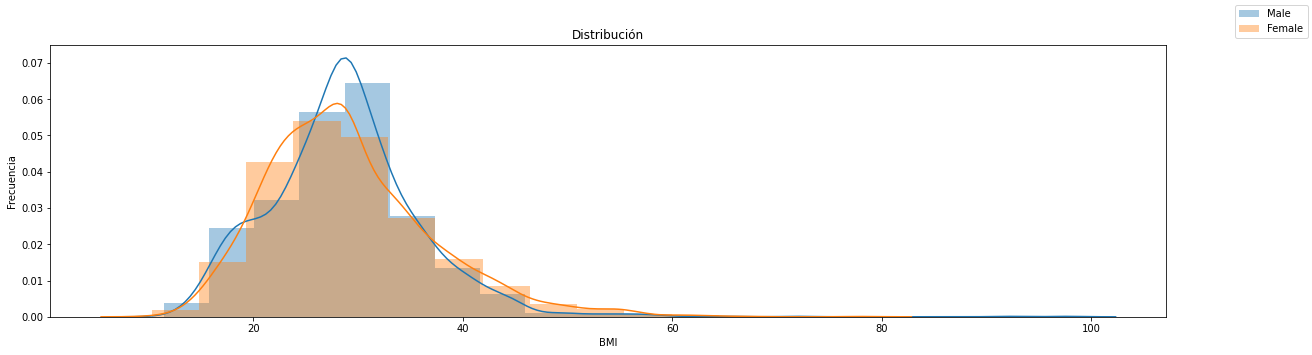

In [22]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.gender == 'Male'].bmi, kde=True, hist=True, bins=20, label='Male')
sns.distplot(stroke_dataset[stroke_dataset.gender == 'Female'].bmi, kde=True, hist=True, bins=15, label='Female')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Podemos observar que el nivel de BMI de los hombres se distribuye de una manera mas normal que el de las mujeres.
La mayor concentracion de BMI en hombres se haya aproximadamente en 30, mientras que el de las mujeres se distribuye mas equitativamente entre 20 y 30.
Hay una ligera concentracion mayor en las mujeres de BMI mayor a 40 en relacion a los hombres, pero el genero masculino es el de outliers mas marcados.

### Representacion de la relacion entre niveles de glucosa y BMI diferenciado por genero

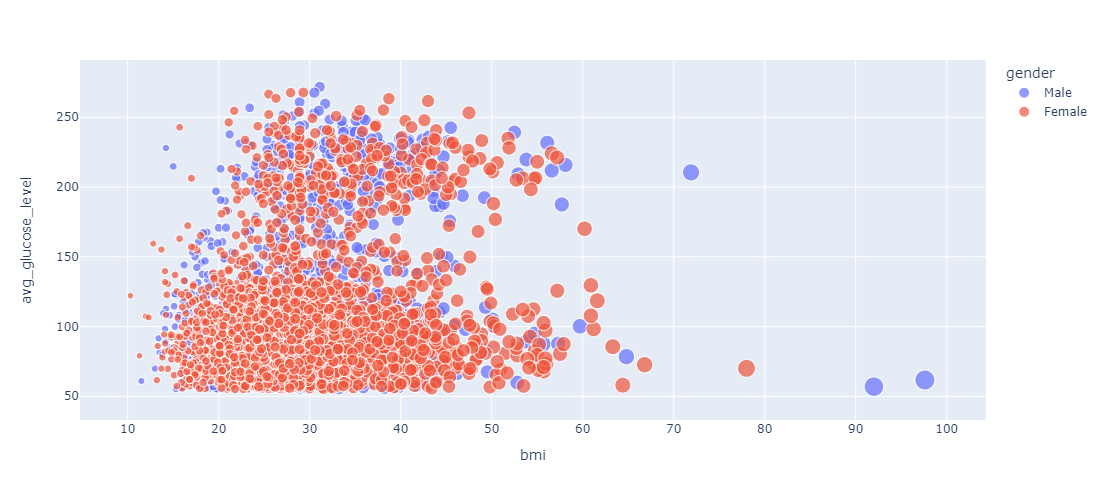

In [31]:
fig = px.scatter(stroke_dataset, x="bmi", y="avg_glucose_level",color='gender',size='bmi', width=1100, height=500)
fig.show()

El grafico desea mostrar que relacion puede llegar a haber entre nivel de glucosa y BMI. Si bien en el grafico no podemos inferir una relacion lineal entre ambas, siendo un valor determinado de BMI asociado generalmente a un intervalo especifico, la medicina ha demostrado que hay una directa correlacion entre un BMI elevado y un nivel de glucosa elevado. Un nivel de glucosa elevado conlleva a diabetes, y se da generalmente en persona de BMI elevado con una ingesta exagerada de azucares procesados.

### Distribución entre los generos en función del nivel de glucosa

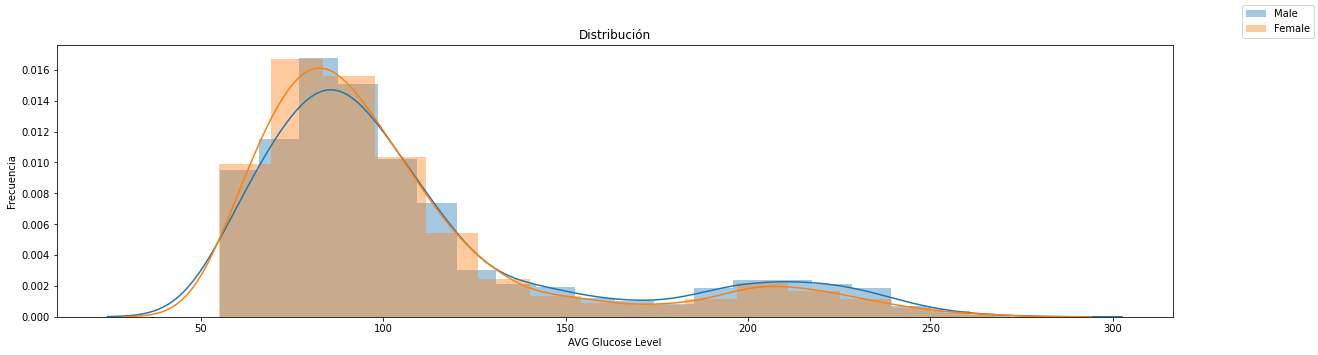

In [51]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.gender == 'Male'].avg_glucose_level, kde=True, hist=True, bins=20, label='Male')
sns.distplot(stroke_dataset[stroke_dataset.gender == 'Female'].avg_glucose_level, kde=True, hist=True, bins=15, label='Female')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Ambos generos se distribuyen de manera muy similar, con la mayoria de los integrantes del dataset encontrandose entre los valores 60-100 de glucosa.

### Distribución entre los diferentes tipos de trabajo en función del nivel de glucosa

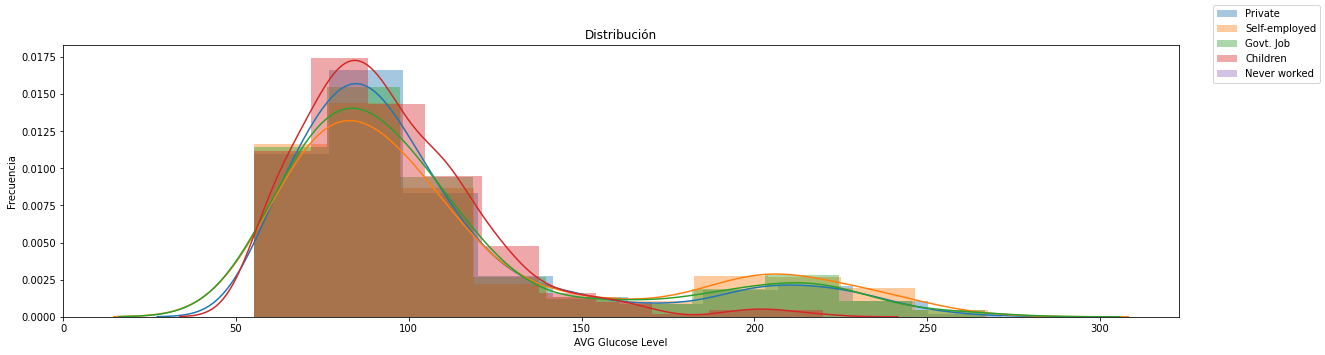

In [52]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Private'].avg_glucose_level, kde=True, hist=True, bins=10, label='Private')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Self-employed'].avg_glucose_level, kde=True, hist=True, bins=10, label='Self-employed')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Govt_job'].avg_glucose_level, kde=True, hist=True, bins=10, label='Govt. Job')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'children'].avg_glucose_level, kde=True, hist=True, bins=10, label='Children')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'never_worked'].avg_glucose_level, kde=True, hist=True, bins=10, label='Never worked')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

El grafico intenta mostrar la diferencia en base a los tipos de trabajo. Es facil inferir que los ninos tienen un menor nivel de glucosa en general, y que los self employed son el grupo de personas de cola mas pesada.

### Distribución entre los diferentes tipos de trabajo en función del BMI

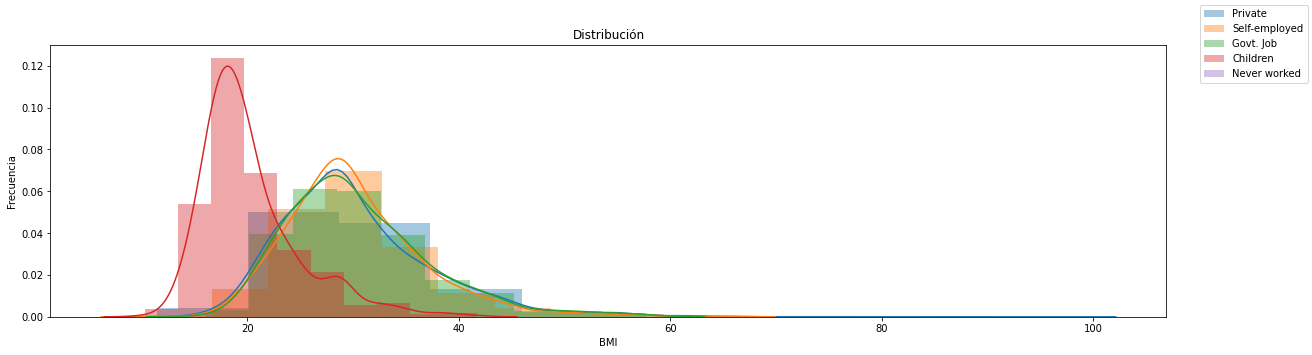

In [53]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Private'].bmi, kde=True, hist=True, bins=10, label='Private')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Self-employed'].bmi, kde=True, hist=True, bins=10, label='Self-employed')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Govt_job'].bmi, kde=True, hist=True, bins=10, label='Govt. Job')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'children'].bmi, kde=True, hist=True, bins=10, label='Children')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'never_worked'].bmi, kde=True, hist=True, bins=10, label='Never worked')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Este grafico a diferencia del anterior utiliza el BMI como indicador. El mismo patron se repite en los ninos, siendo este grupo el de menor BMI.
El resto de los grupos se distribuyen similarmente.

### Distribución entre los diferentes residencias en función del nivel de glucosa

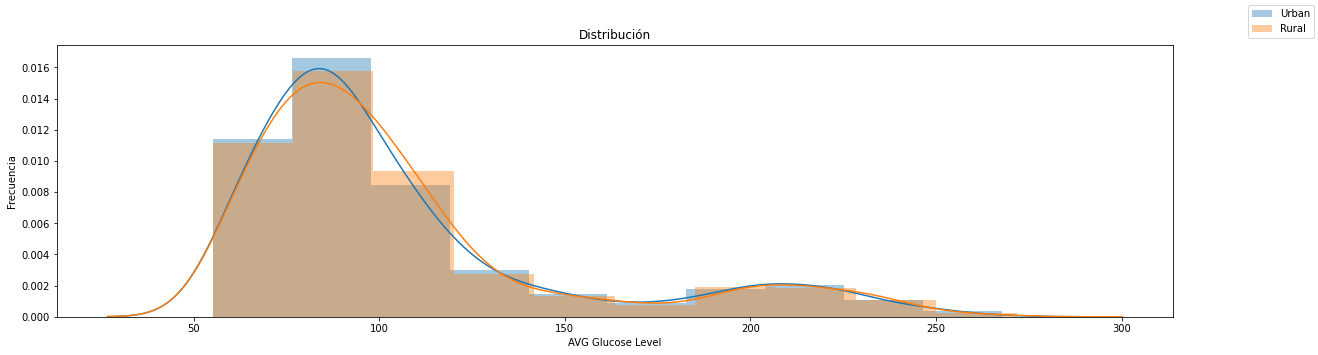

In [54]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Urban'].avg_glucose_level, kde=True, hist=True, bins=10, label='Urban')
sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Rural'].avg_glucose_level, kde=True, hist=True, bins=10, label='Rural')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Se observan diferencias despreciables entre residentes urbanos y rurales con respecto a sus niveles de glucosa.

### Distribución entre los diferentes residencias de trabajo en función del BMI

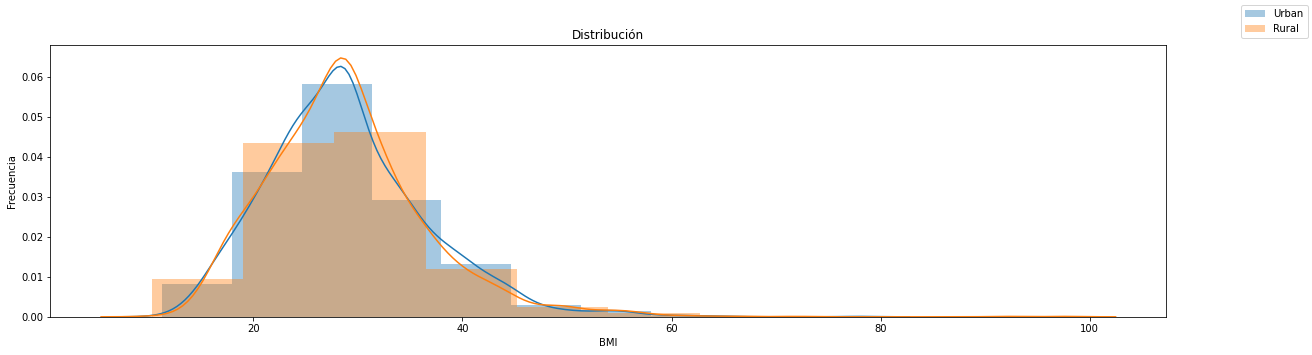

In [55]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Urban'].bmi, kde=True, hist=True, bins=10, label='Urban')
sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Rural'].bmi, kde=True, hist=True, bins=10, label='Rural')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

El BMI nos indica que tampoco no hay diferencias de distribucion con respecto a la zona de residencia.

### Análisis del tipo de trabajo

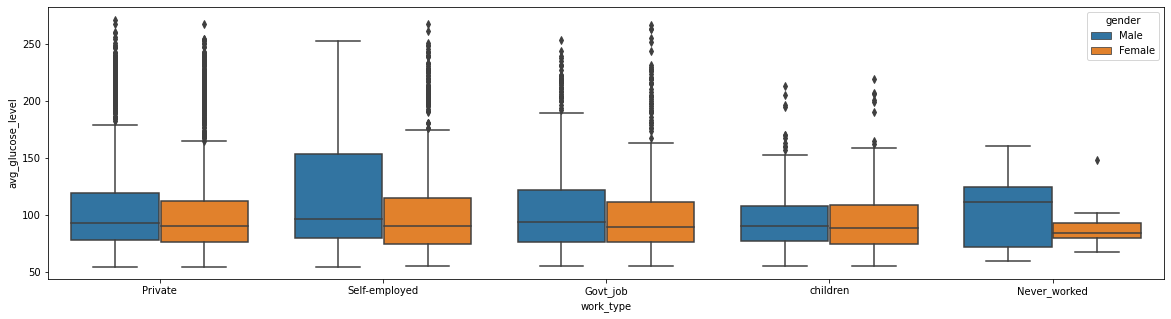

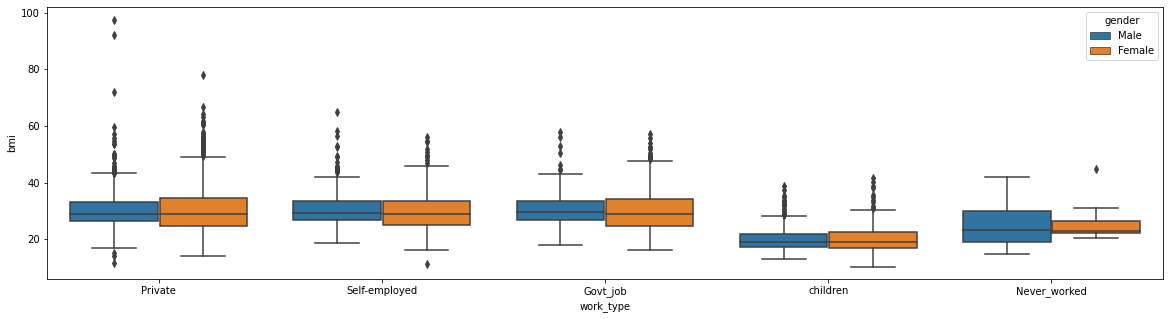

In [56]:
plt.figure(figsize=(20,5))
sns.boxplot(x='work_type',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='work_type',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

### Análisis del tipo de trabajo

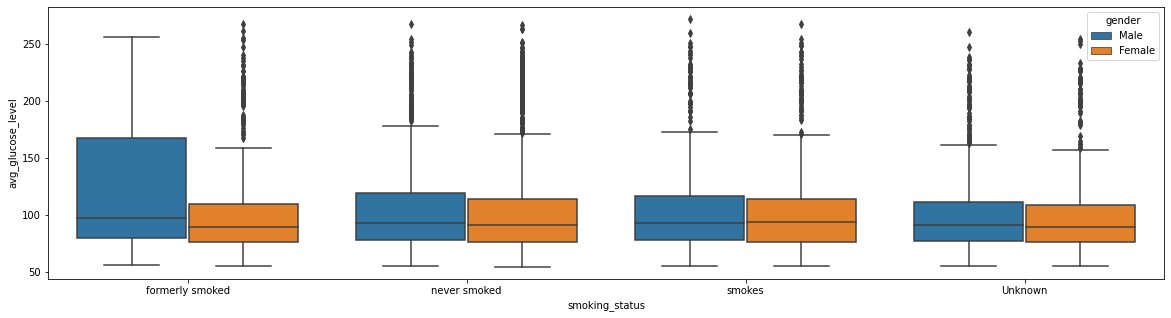

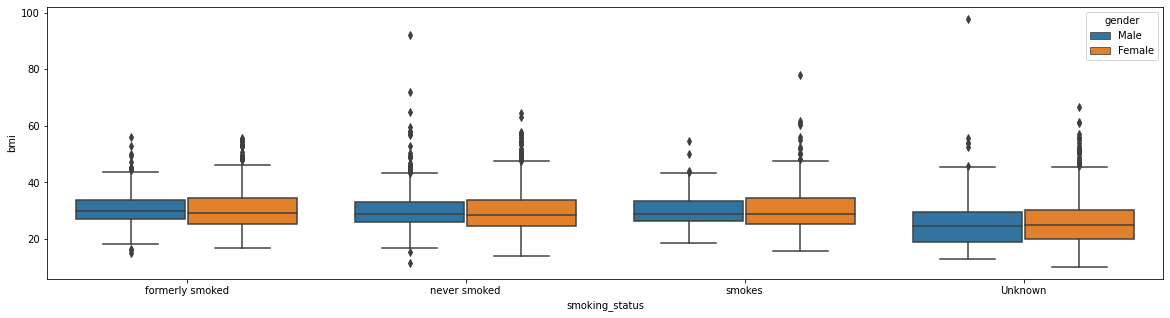

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='smoking_status',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='smoking_status',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

### Análisis en función de donde vive la gente

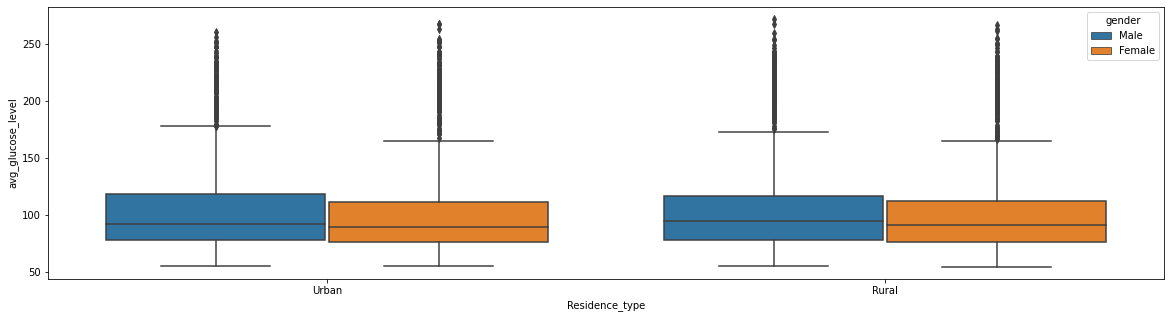

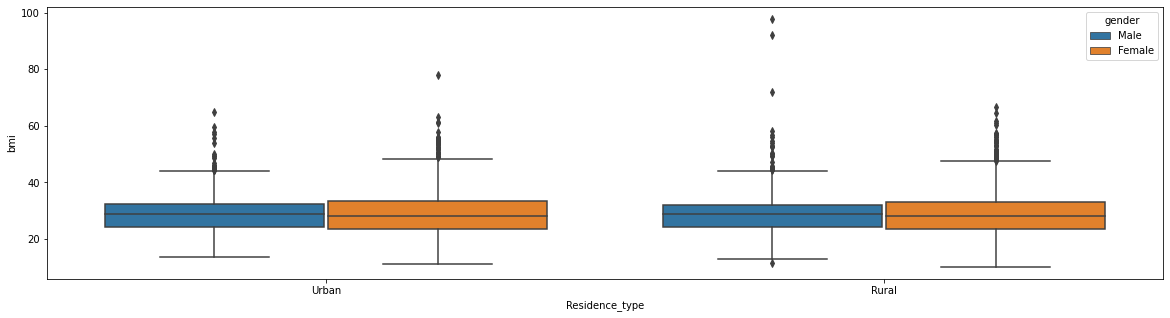

In [58]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Residence_type',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='Residence_type',y="bmi",data=stroke_dataset,hue='gender')
plt.show()